In [42]:
!pip install pandas matplotlib seaborn

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("test(in)_with_sentiment.csv")

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   text       2191 non-null   object
 5   sentiment  2191 non-null   object
dtypes: object(6)
memory usage: 102.8+ KB


In [46]:
df.isnull().sum()


Subject      0
body         0
date         0
from         0
text         0
sentiment    0
dtype: int64

In [47]:
 df.shape

(2191, 6)

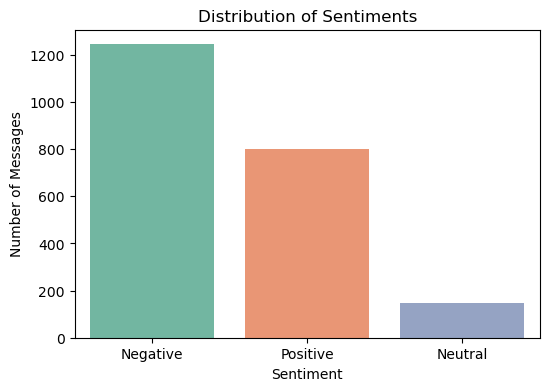

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, order=df['sentiment'].value_counts().index, palette="Set2")
plt.title("Distribution of Sentiments")
plt.ylabel("Number of Messages")
plt.xlabel("Sentiment")
plt.show()


In [49]:
df['date'] = pd.to_datetime(df['date'], errors="coerce")

In [50]:
sentiment_over_time = df.groupby([df['date'].dt.to_period("M"), 'sentiment']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

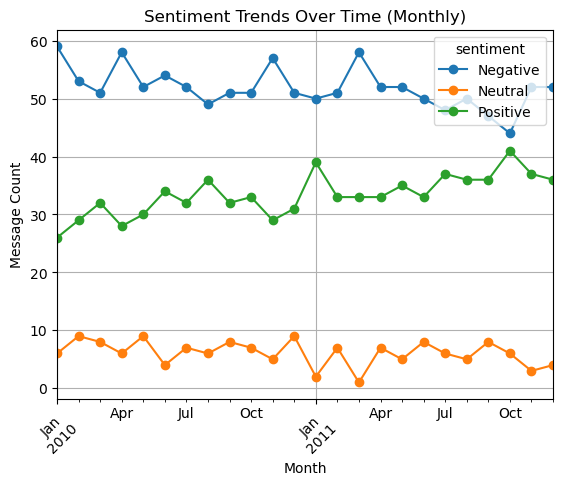

In [51]:
plt.figure(figsize=(12,6))
sentiment_over_time.plot(kind="line", marker="o")
plt.title("Sentiment Trends Over Time (Monthly)")
plt.ylabel("Message Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [52]:
top_senders = df.groupby(['from','sentiment']).size().unstack(fill_value=0).sort_values(by="Positive", ascending=False).head(10)

<Figure size 1200x600 with 0 Axes>

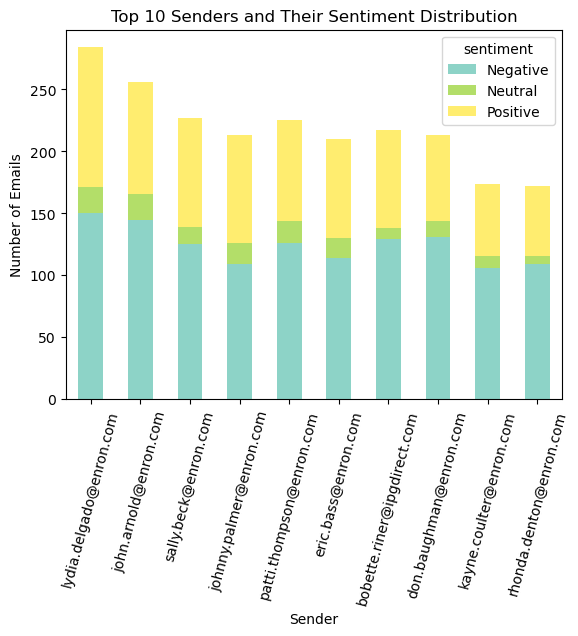

In [53]:
plt.figure(figsize=(12,6))
top_senders.plot(kind="bar", stacked=True, colormap="Set3")
plt.title("Top 10 Senders and Their Sentiment Distribution")
plt.ylabel("Number of Emails")
plt.xlabel("Sender")
plt.xticks(rotation=75)
plt.show()

In [54]:
from collections import Counter
import re

In [55]:
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  
    return text.split()

positive_words = Counter([word for text in df[df['sentiment']=="Positive"]['text'] for word in preprocess(text)])
negative_words = Counter([word for text in df[df['sentiment']=="Negative"]['text'] for word in preprocess(text)])

print("\nTop Positive Words:", positive_words.most_common(10))
print("Top Negative Words:", negative_words.most_common(10))



Top Positive Words: [('the', 1101), ('to', 1097), ('you', 791), ('i', 695), ('and', 648), ('for', 578), ('a', 466), ('in', 466), ('of', 428), ('on', 415)]
Top Negative Words: [('the', 2145), ('to', 1514), ('and', 1010), ('you', 982), ('for', 902), ('i', 758), ('a', 655), ('of', 633), ('in', 591), ('is', 582)]
